In [17]:
import pandas as pd

# Buat data penjualan toko
data = {
    "Tanggal": ["2025-04-11", "2025-05-14", "2025-06-15", "2025-07-16", "2025-08-17", "2025-09-18"],
    "Produk": ["Hp 15 Pro Max", "Hadset", "Lcd", "Kamera", "Casing", "Batrai"],
    "Jumlah Terjual": [19, 15, 71, 33, 112, 88],
    "Stok": [26, 56, 89, 78, 44, 5],
    "Harga Satuan": [230000000, 36000, 600000, 3000000, 50000, 160000]
}

# Simpan dalam DataFrame
df = pd.DataFrame(data)

# Simpan sebagai file CSV
df.to_csv("data_penjualan.csv", index=False)

print("File CSV berhasil dibuat dan disimpan sebagai 'data_penjualan.csv'!")


File CSV berhasil dibuat dan disimpan sebagai 'data_penjualan.csv'!


In [18]:
# Membaca file CSV
df = pd.read_csv("data_penjualan.csv")

# Menampilkan 5 data pertama
print(df.head())


      Tanggal         Produk  Jumlah Terjual  Stok  Harga Satuan
0  2025-04-11  Hp 15 Pro Max              19    26     230000000
1  2025-05-14         Hadset              15    56         36000
2  2025-06-15            Lcd              71    89        600000
3  2025-07-16         Kamera              33    78       3000000
4  2025-08-17         Casing             112    44         50000


In [19]:
# Cek apakah ada data yang kosong
print(df.isnull().sum())

# Konversi kolom "Tanggal" ke format datetime
df["Tanggal"] = pd.to_datetime(df["Tanggal"])

# Tambahkan kolom "Total Penjualan"
df["Total Penjualan"] = df["Jumlah Terjual"] * df["Harga Satuan"]

# Tambahkan kolom "Keuntungan" (asumsi modal 10.000 per produk)
df["Keuntungan"] = df["Total Penjualan"] - (df["Jumlah Terjual"] * 10000)

# Menampilkan hasil transformasi
print(df.head())


Tanggal           0
Produk            0
Jumlah Terjual    0
Stok              0
Harga Satuan      0
dtype: int64
     Tanggal         Produk  Jumlah Terjual  Stok  Harga Satuan  \
0 2025-04-11  Hp 15 Pro Max              19    26     230000000   
1 2025-05-14         Hadset              15    56         36000   
2 2025-06-15            Lcd              71    89        600000   
3 2025-07-16         Kamera              33    78       3000000   
4 2025-08-17         Casing             112    44         50000   

   Total Penjualan  Keuntungan  
0       4370000000  4369810000  
1           540000      390000  
2         42600000    41890000  
3         99000000    98670000  
4          5600000     4480000  


In [20]:
!pip install scikit-learn


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Pilih fitur (X) dan target (y)
X = df[["Jumlah Terjual", "Stok"]]
y = (df["Stok"] < 5).astype(int)  # 1 jika stok kurang dari 5, 0 jika cukup

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
print("Akurasi Model:", accuracy_score(y_test, y_pred))


Akurasi Model: 1.0


In [22]:
# Contoh produk baru (jumlah terjual 8, stok tersisa 3)
produk_baru = [[8, 3]]
prediksi = model.predict(produk_baru)

if prediksi[0] == 1:
    print("Produk perlu di-restock!")
else:
    print("Stok masih cukup.")


Stok masih cukup.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


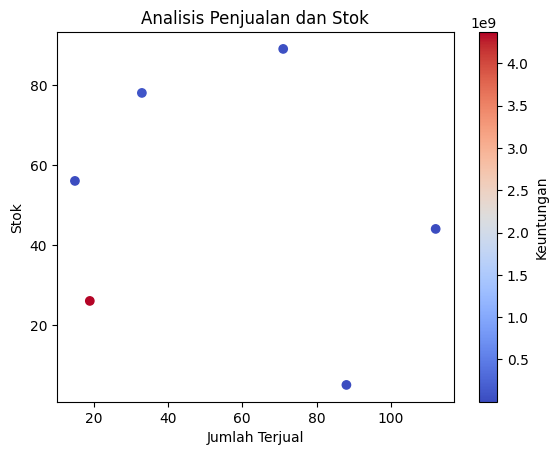

In [23]:
import matplotlib.pyplot as plt

plt.scatter(df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar(label="Keuntungan")
plt.show()
